In [1]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
airport = pd.read_csv('airports.csv')
airlines = pd.read_csv('airlines.csv')
flights = pd.read_csv("flights.csv")

/var/folders/yb/jvxmk2wx1xs9sr8z2msg6nj80000gn/T/ipykernel_8688/3713853660.py:3: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv("flights.csv")


In [3]:
list(flights.columns) 

['YEAR',
 'MONTH',
 'DAY',
 'DAY_OF_WEEK',
 'AIRLINE',
 'FLIGHT_NUMBER',
 'TAIL_NUMBER',
 'ORIGIN_AIRPORT',
 'DESTINATION_AIRPORT',
 'SCHEDULED_DEPARTURE',
 'DEPARTURE_TIME',
 'DEPARTURE_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'WHEELS_ON',
 'TAXI_IN',
 'SCHEDULED_ARRIVAL',
 'ARRIVAL_TIME',
 'ARRIVAL_DELAY',
 'DIVERTED',
 'CANCELLED',
 'CANCELLATION_REASON',
 'AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY']

In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [5]:
flights.shape

(5819079, 31)

In [6]:
flights = flights.iloc[:1000000]

In [7]:
flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,960842.000000,960842.000000,960145.000000,960145.000000,...,1000000.000000,959117.000000,957394.000000,1000000.000000,1000000.000000,221041.000000,221041.000000,221041.000000,221041.000000,221041.000000
mean,2015.0,1.630873,14.087290,3.942253,2259.305292,1322.605368,1333.892931,11.525092,16.735891,1357.706468,...,1505.500062,1492.772831,7.904573,0.002474,0.040132,13.879651,0.057921,18.040721,22.955108,3.631589
std,0.0,0.659208,8.846599,1.957458,1799.970834,470.183312,482.295869,39.451588,10.204402,482.567175,...,485.664098,506.662151,42.383991,0.049678,0.196269,25.747212,1.803159,46.037156,41.895492,23.792253
min,2015.0,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,-61.000000,1.000000,1.000000,...,1.000000,1.000000,-82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,1.000000,6.000000,2.000000,756.000000,920.000000,929.000000,-5.000000,11.000000,944.000000,...,1121.000000,1116.000000,-12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,2.000000,14.000000,4.000000,1727.000000,1320.000000,1329.000000,-1.000000,14.000000,1343.000000,...,1525.000000,1522.000000,-3.000000,0.000000,0.000000,4.000000,0.000000,2.000000,4.000000,0.000000
75%,2015.0,2.000000,22.000000,6.000000,3488.000000,1720.000000,1731.000000,11.000000,19.000000,1745.000000,...,1915.000000,1917.000000,12.000000,0.000000,0.000000,19.000000,0.000000,18.000000,29.000000,0.000000
max,2015.0,3.000000,31.000000,7.000000,9794.000000,2359.000000,2400.000000,1988.000000,225.000000,2400.000000,...,2359.000000,2400.000000,1971.000000,1.000000,1.000000,830.000000,241.000000,1971.000000,1313.000000,1152.000000


In [8]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2015,3,7,6,OO,6396,N114SY,BOI,SFO,915,...,957.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
999996,2015,3,7,6,AA,334,N566AA,DFW,MFE,916,...,1042.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
999997,2015,3,7,6,MQ,3641,N601MQ,DSM,DFW,916,...,1131.0,11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
999998,2015,3,7,6,OO,5244,N710SK,LAX,ASE,916,...,1242.0,26.0,0,0,NaN,26.0,0.0,0.0,0.0,0.0


In [10]:
airlines = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()

In [11]:
airlines

{'UA': 'United Air Lines Inc.',
 'AA': 'American Airlines Inc.',
 'US': 'US Airways Inc.',
 'F9': 'Frontier Airlines Inc.',
 'B6': 'JetBlue Airways',
 'OO': 'Skywest Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'WN': 'Southwest Airlines Co.',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'VX': 'Virgin America'}

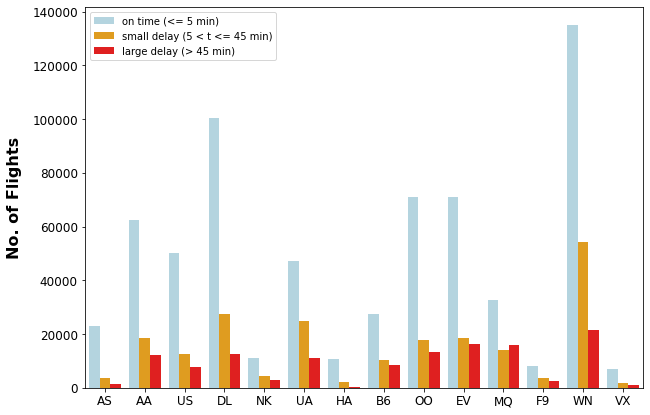

In [14]:
def classify_delay(departure_delay):
    if departure_delay <= 5:
        return 'on time'
    elif departure_delay <= 45:
        return 'small delay'
    else:
        return 'large delay'

flights['DELAY_LEVEL'] = flights['DEPARTURE_DELAY'].apply(classify_delay)

fig = plt.figure(figsize=(10,7))
ax = sns.countplot(x="AIRLINE", hue='DELAY_LEVEL', data=flights, palette= ["#ADD8E6","#FFA500","#FF0000"])

labels = ax.get_xticklabels()
ax.set_xticklabels(labels)
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
ax.xaxis.label.set_visible(False)
plt.ylabel('No. of Flights', fontsize=16, weight = 'bold', labelpad=10)

L = plt.legend()
L.get_texts()[0].set_text('on time (<= 5 min)')
L.get_texts()[1].set_text('small delay (5 < t <= 45 min)')
L.get_texts()[2].set_text('large delay (> 45 min)')
plt.show()


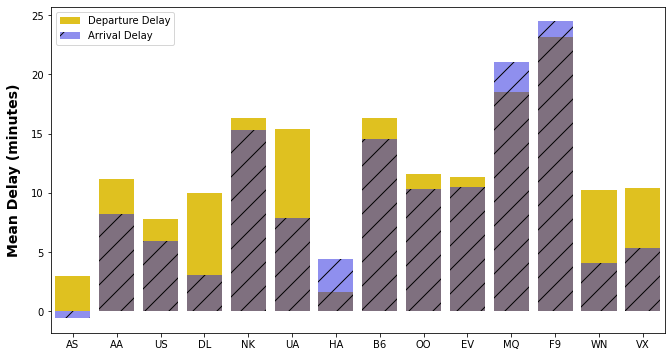

In [16]:
fig, ax = plt.subplots(figsize=(11,6))
sns.barplot(x="AIRLINE", y="DEPARTURE_DELAY", data=flights, color="gold", ci=None, ax=ax)
sns.barplot(x="AIRLINE", y="ARRIVAL_DELAY", data=flights, color="blue", hatch='/', alpha=0.5, ci=None, ax=ax)

labels = ax.get_xticklabels()
ax.set_xticklabels(labels)
ax.xaxis.label.set_visible(False)
plt.ylabel('Mean Delay (minutes)', fontsize=14, weight='bold', labelpad=10)
plt.legend(labels=['Departure Delay', 'Arrival Delay'])

plt.show()

In [17]:
airport.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [18]:
airport = airport.dropna(subset = ['LATITUDE','LONGITUDE'])

In [19]:
airport.head(10)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


In [20]:
airlines

{'UA': 'United Air Lines Inc.',
 'AA': 'American Airlines Inc.',
 'US': 'US Airways Inc.',
 'F9': 'Frontier Airlines Inc.',
 'B6': 'JetBlue Airways',
 'OO': 'Skywest Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'WN': 'Southwest Airlines Co.',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'VX': 'Virgin America'}

In [44]:
flights_NULL = flights.isnull().sum()*100/flights.shape[0]
flights_NULL

YEAR                    0.0000
MONTH                   0.0000
DAY                     0.0000
DAY_OF_WEEK             0.0000
AIRLINE                 0.0000
FLIGHT_NUMBER           0.0000
TAIL_NUMBER             0.7709
ORIGIN_AIRPORT          0.0000
DESTINATION_AIRPORT     0.0000
SCHEDULED_DEPARTURE     0.0000
DEPARTURE_TIME          3.9158
DEPARTURE_DELAY         3.9158
TAXI_OUT                3.9855
WHEELS_OFF              3.9855
SCHEDULED_TIME          0.0002
ELAPSED_TIME            4.2606
AIR_TIME                4.2606
DISTANCE                0.0000
WHEELS_ON               4.0883
TAXI_IN                 4.0883
SCHEDULED_ARRIVAL       0.0000
ARRIVAL_TIME            4.0883
ARRIVAL_DELAY           4.2606
DIVERTED                0.0000
CANCELLED               0.0000
CANCELLATION_REASON    95.9868
AIR_SYSTEM_DELAY       77.8959
SECURITY_DELAY         77.8959
AIRLINE_DELAY          77.8959
LATE_AIRCRAFT_DELAY    77.8959
WEATHER_DELAY          77.8959
DELAY_LEVEL             0.0000
dtype: f

I drop all the rows for some attributes which have null values as they make up a small percentage of the dataset


In [45]:
flights1 = flights.dropna(subset = ["TAIL_NUMBER",'DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME',
'ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY'])

In [46]:
flights1.shape

(957394, 32)

In [47]:
flights1.isnull().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER                 0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME              0
DEPARTURE_DELAY             0
TAXI_OUT                    0
WHEELS_OFF                  0
SCHEDULED_TIME              0
ELAPSED_TIME                0
AIR_TIME                    0
DISTANCE                    0
WHEELS_ON                   0
TAXI_IN                     0
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME                0
ARRIVAL_DELAY               0
DIVERTED                    0
CANCELLED                   0
CANCELLATION_REASON    957394
AIR_SYSTEM_DELAY       736353
SECURITY_DELAY         736353
AIRLINE_DELAY          736353
LATE_AIRCRAFT_DELAY    736353
WEATHER_DELAY          736353
DELAY_LEVEL                 0
dtype: int64

In [48]:
flights_modified = flights1.dropna(subset = ['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'])
flights_modified = flights_modified.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','TAIL_NUMBER','SCHEDULED_DEPARTURE','DEPARTURE_TIME','SCHEDULED_TIME',
                     'SCHEDULED_ARRIVAL','ARRIVAL_TIME','DIVERTED','CANCELLED','CANCELLATION_REASON','FLIGHT_NUMBER','WHEELS_OFF',
                     'WHEELS_ON','AIR_TIME'],axis = 1)

In [49]:
flights_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221041 entries, 27 to 999998
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AIRLINE              221041 non-null  object 
 1   ORIGIN_AIRPORT       221041 non-null  object 
 2   DESTINATION_AIRPORT  221041 non-null  object 
 3   DEPARTURE_DELAY      221041 non-null  float64
 4   TAXI_OUT             221041 non-null  float64
 5   ELAPSED_TIME         221041 non-null  float64
 6   DISTANCE             221041 non-null  int64  
 7   TAXI_IN              221041 non-null  float64
 8   ARRIVAL_DELAY        221041 non-null  float64
 9   AIR_SYSTEM_DELAY     221041 non-null  float64
 10  SECURITY_DELAY       221041 non-null  float64
 11  AIRLINE_DELAY        221041 non-null  float64
 12  LATE_AIRCRAFT_DELAY  221041 non-null  float64
 13  WEATHER_DELAY        221041 non-null  float64
 14  DELAY_LEVEL          221041 non-null  object 
dtypes: float64(10), 

In [50]:
Flight_Delays = flights_modified

Dropping all the contributing factors of delays as we are only going to focus on the over all delay

In [51]:
flights2 = flights1.drop(['CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
                    'LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis = 1)

In [52]:
flights2.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
DELAY_LEVEL            0
dtype: int64

In [53]:
flights2.shape

(957394, 26)

In [54]:
flights2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957394 entries, 0 to 999999
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 957394 non-null  int64  
 1   MONTH                957394 non-null  int64  
 2   DAY                  957394 non-null  int64  
 3   DAY_OF_WEEK          957394 non-null  int64  
 4   AIRLINE              957394 non-null  object 
 5   FLIGHT_NUMBER        957394 non-null  int64  
 6   TAIL_NUMBER          957394 non-null  object 
 7   ORIGIN_AIRPORT       957394 non-null  object 
 8   DESTINATION_AIRPORT  957394 non-null  object 
 9   SCHEDULED_DEPARTURE  957394 non-null  int64  
 10  DEPARTURE_TIME       957394 non-null  float64
 11  DEPARTURE_DELAY      957394 non-null  float64
 12  TAXI_OUT             957394 non-null  float64
 13  WHEELS_OFF           957394 non-null  float64
 14  SCHEDULED_TIME       957394 non-null  float64
 15  ELAPSED_TIME     

In [55]:
flights2.DEPARTURE_TIME.dtype

dtype('float64')

In [56]:
flights2.DEPARTURE_TIME

0         2354.0
1            2.0
2           18.0
3           15.0
4           24.0
           ...  
999995     912.0
999996     919.0
999997     939.0
999998     915.0
999999     915.0
Name: DEPARTURE_TIME, Length: 957394, dtype: float64

The times are not in the correct format so i will transform them into HH:MM format


In [57]:
def CreateTimeFormatted(hours):
        if hours == 2400:
            hours = 0
        else:
            hours = "{0:04d}".format(int(hours))
            Hourmin = datetime.time(int(hours[0:2]), int(hours[2:4]))
            return Hourmin

In [58]:
flights2['Actual_Departure'] =flights1['DEPARTURE_TIME'].apply(CreateTimeFormatted)
flights2['Actual_Departure']

0         23:54:00
1         00:02:00
2         00:18:00
3         00:15:00
4         00:24:00
            ...   
999995    09:12:00
999996    09:19:00
999997    09:39:00
999998    09:15:00
999999    09:15:00
Name: Actual_Departure, Length: 957394, dtype: object

In [59]:
flights2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'DELAY_LEVEL',
       'Actual_Departure'],
      dtype='object')

Transform year month and day into date time format

In [60]:
flights2['Date'] = pd.to_datetime(flights2[['YEAR','MONTH','DAY']])
flights2.Date

0        2015-01-01
1        2015-01-01
2        2015-01-01
3        2015-01-01
4        2015-01-01
            ...    
999995   2015-03-07
999996   2015-03-07
999997   2015-03-07
999998   2015-03-07
999999   2015-03-07
Name: Date, Length: 957394, dtype: datetime64[ns]

In [61]:
flights2['Day'] = flights2['Date'].dt.day_name()

In [62]:
flights2['Actual_Departure'] =flights1['DEPARTURE_TIME'].apply(CreateTimeFormatted)
flights2['Scheduled_Arrival'] =flights1['SCHEDULED_ARRIVAL'].apply(CreateTimeFormatted)
flights2['Scheduled_Departure'] =flights1['SCHEDULED_DEPARTURE'].apply(CreateTimeFormatted)
flights2['Actual_Arrival'] =flights2['ARRIVAL_TIME'].apply(CreateTimeFormatted)

In [63]:
flights2 = flights2.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')

TypeError: Can only merge Series or DataFrame objects, a <class 'dict'> was passed

In [ ]:
flights2 = flights2.drop(['AIRLINE_x','IATA_CODE'], axis=1)

In [ ]:
flights2 = flights2.rename(columns={"AIRLINE_y":"AIRLINE"})

In [64]:
flights2 = flights2.merge(airport, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')
flights2 = flights2.merge(airport, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='inner')

In [65]:
flights2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'DELAY_LEVEL',
       'Actual_Departure', 'Date', 'Day', 'Scheduled_Arrival',
       'Scheduled_Departure', 'Actual_Arrival', 'IATA_CODE_x', 'AIRPORT_x',
       'CITY_x', 'STATE_x', 'COUNTRY_x', 'LATITUDE_x', 'LONGITUDE_x',
       'IATA_CODE_y', 'AIRPORT_y', 'CITY_y', 'STATE_y', 'COUNTRY_y',
       'LATITUDE_y', 'LONGITUDE_y'],
      dtype='object')

In [66]:
flights2 = flights2.drop(['LATITUDE_x', 'LONGITUDE_x',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y','STATE_x', 'COUNTRY_x'], axis=1)

In [67]:
flights2 = flights2.rename(columns={'IATA_CODE_x':'Org_Airport_Code','AIRPORT_x':'Org_Airport_Name','CITY_x':'Origin_city',
                             'IATA_CODE_y':'Dest_Airport_Code','AIRPORT_y':'Dest_Airport_Name','CITY_y':'Destination_city'})

In [68]:
flights2

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,Day,Scheduled_Arrival,Scheduled_Departure,Actual_Arrival,Org_Airport_Code,Org_Airport_Name,Origin_city,Dest_Airport_Code,Dest_Airport_Name,Destination_city
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,Thursday,04:30:00,00:05:00,04:08:00,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
1,2015,1,1,4,AS,108,N309AS,ANC,SEA,45,...,Thursday,05:09:00,00:45:00,04:55:00,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
2,2015,1,1,4,DL,1560,N3743H,ANC,SEA,45,...,Thursday,05:15:00,00:45:00,04:51:00,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
3,2015,1,1,4,AS,134,N464AS,ANC,SEA,155,...,Thursday,06:33:00,01:55:00,05:58:00,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
4,2015,1,1,4,AS,114,N303AS,ANC,SEA,220,...,Thursday,06:40:00,02:20:00,06:28:00,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956216,2015,3,4,3,OO,5465,N969SW,JMS,DVL,2318,...,Wednesday,23:56:00,23:18:00,23:43:00,JMS,Jamestown Regional Airport,Jamestown,DVL,Devils Lake Regional Airport,Devils Lake
956217,2015,3,5,4,OO,5315,N918SW,JMS,DVL,1318,...,Thursday,13:56:00,13:18:00,13:35:00,JMS,Jamestown Regional Airport,Jamestown,DVL,Devils Lake Regional Airport,Devils Lake
956218,2015,3,5,4,OO,5465,N925SW,JMS,DVL,2318,...,Thursday,23:56:00,23:18:00,23:36:00,JMS,Jamestown Regional Airport,Jamestown,DVL,Devils Lake Regional Airport,Devils Lake
956219,2015,3,6,5,OO,5315,N932SW,JMS,DVL,1318,...,Friday,13:56:00,13:18:00,14:01:00,JMS,Jamestown Regional Airport,Jamestown,DVL,Devils Lake Regional Airport,Devils Lake


In [70]:
data_vizual = pd.DataFrame(flights2[['AIRLINE','Org_Airport_Name','Origin_city',
                               'Dest_Airport_Name','Destination_city','ORIGIN_AIRPORT',
                               'DESTINATION_AIRPORT','DISTANCE','Actual_Departure','Date','Day',
                               'Scheduled_Departure','DEPARTURE_DELAY','Actual_Arrival','Scheduled_Arrival','ARRIVAL_DELAY',
                              'SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','TAXI_IN','TAXI_OUT','DIVERTED',]])

In [71]:
flights2.DEPARTURE_TIME.dtype

dtype('float64')

In [72]:
data_vizual = data_vizual.dropna(subset = ['Actual_Departure','Actual_Arrival'])

In [73]:
data_vizual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955807 entries, 0 to 956220
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   AIRLINE              955807 non-null  object        
 1   Org_Airport_Name     955807 non-null  object        
 2   Origin_city          955807 non-null  object        
 3   Dest_Airport_Name    955807 non-null  object        
 4   Destination_city     955807 non-null  object        
 5   ORIGIN_AIRPORT       955807 non-null  object        
 6   DESTINATION_AIRPORT  955807 non-null  object        
 7   DISTANCE             955807 non-null  int64         
 8   Actual_Departure     955807 non-null  object        
 9   Date                 955807 non-null  datetime64[ns]
 10  Day                  955807 non-null  object        
 11  Scheduled_Departure  955807 non-null  object        
 12  DEPARTURE_DELAY      955807 non-null  float64       
 13  Actual_Arrival

In [74]:
Flights = data_vizual
Flights

,AIRLINE,Org_Airport_Name,Origin_city,Dest_Airport_Name,Destination_city,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,Date,...,DEPARTURE_DELAY,Actual_Arrival,Scheduled_Arrival,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,AS,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,23:54:00,2015-01-01,...,-11.0,04:08:00,04:30:00,-22.0,205.0,194.0,169.0,4.0,21.0,0
1,AS,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,00:41:00,2015-01-01,...,-4.0,04:55:00,05:09:00,-14.0,204.0,194.0,173.0,4.0,17.0,0
2,DL,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,00:31:00,2015-01-01,...,-14.0,04:51:00,05:15:00,-24.0,210.0,200.0,171.0,4.0,25.0,0
3,AS,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,01:40:00,2015-01-01,...,-15.0,05:58:00,06:33:00,-35.0,218.0,198.0,170.0,11.0,17.0,0
4,AS,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,02:09:00,2015-01-01,...,-11.0,06:28:00,06:40:00,-12.0,200.0,199.0,176.0,8.0,15.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956216,OO,Jamestown Regional Airport,Jamestown,Devils Lake Regional Airport,Devils Lake,JMS,DVL,83,23:05:00,2015-03-04,...,-13.0,23:43:00,23:56:00,-13.0,38.0,38.0,19.0,8.0,11.0,0
956217,OO,Jamestown Regional Airport,Jamestown,Devils Lake Regional Airport,Devils Lake,JMS,DVL,83,13:01:00,2015-03-05,...,-17.0,13:35:00,13:56:00,-21.0,38.0,34.0,20.0,4.0,10.0,0
956218,OO,Jamestown Regional Airport,Jamestown,Devils Lake Regional Airport,Devils Lake,JMS,DVL,83,23:05:00,2015-03-05,...,-13.0,23:36:00,23:56:00,-20.0,38.0,31.0,18.0,5.0,8.0,0
956219,OO,Jamestown Regional Airport,Jamestown,Devils Lake Regional Airport,Devils Lake,JMS,DVL,83,13:25:00,2015-03-06,...,7.0,14:01:00,13:56:00,5.0,38.0,36.0,19.0,5.0,12.0,0


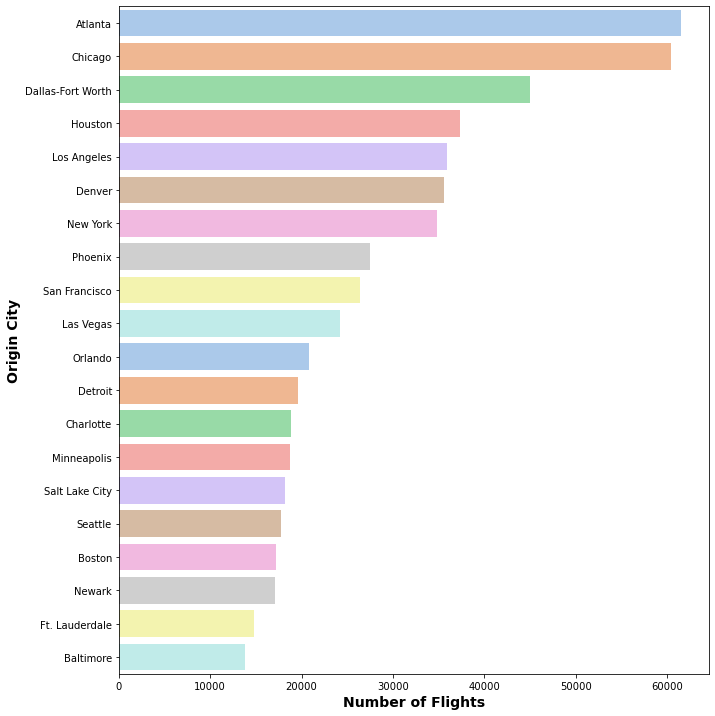

In [77]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.countplot(y=Flights['Origin_city'], data=Flights,
              order=Flights['Origin_city'].value_counts().iloc[:20].index, palette='pastel', ax=ax)
ax.set_yticklabels(ax.get_yticklabels())
plt.tight_layout()
plt.ylabel('Origin City', fontsize=14, weight='bold')
plt.xlabel('Number of Flights', fontsize=14, weight='bold')
plt.show()

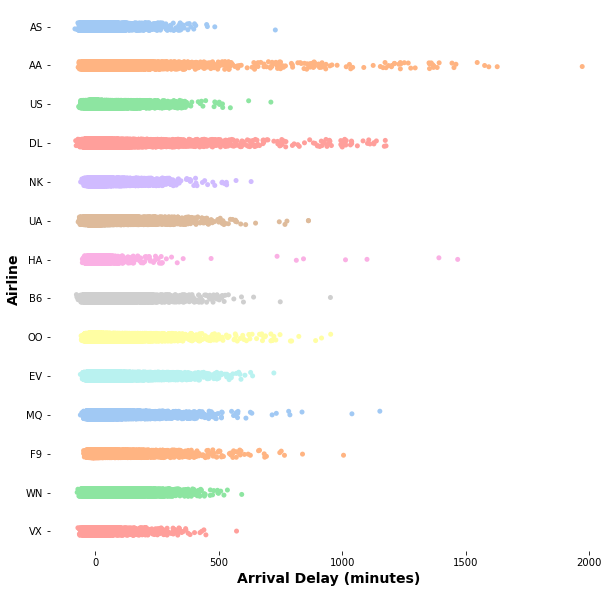

In [78]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.despine(bottom=True, left=True)
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE", data=flights, dodge=True, jitter=True, palette='pastel', ax=ax)
ax.set_xlabel('Arrival Delay (minutes)', fontsize=14, weight='bold')
ax.set_ylabel('Airline', fontsize=14, weight='bold')
plt.show()

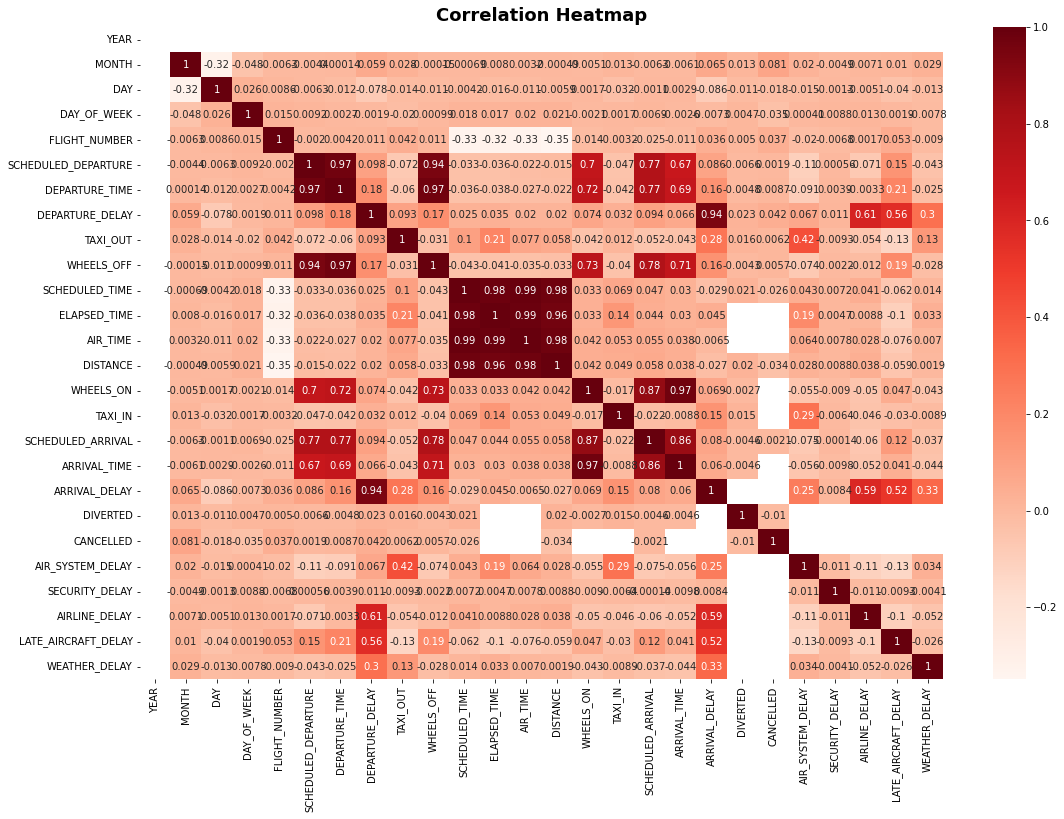

In [79]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(flights.corr(), annot=True, cmap='Reds', ax=ax)
ax.set_title('Correlation Heatmap', fontsize=18, weight='bold')
plt.show()

In [80]:
Flights.head()

,AIRLINE,Org_Airport_Name,Origin_city,Dest_Airport_Name,Destination_city,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,Date,...,DEPARTURE_DELAY,Actual_Arrival,Scheduled_Arrival,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,AS,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,23:54:00,2015-01-01,...,-11.0,04:08:00,04:30:00,-22.0,205.0,194.0,169.0,4.0,21.0,0
1,AS,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,00:41:00,2015-01-01,...,-4.0,04:55:00,05:09:00,-14.0,204.0,194.0,173.0,4.0,17.0,0
2,DL,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,00:31:00,2015-01-01,...,-14.0,04:51:00,05:15:00,-24.0,210.0,200.0,171.0,4.0,25.0,0
3,AS,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,01:40:00,2015-01-01,...,-15.0,05:58:00,06:33:00,-35.0,218.0,198.0,170.0,11.0,17.0,0
4,AS,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,02:09:00,2015-01-01,...,-11.0,06:28:00,06:40:00,-12.0,200.0,199.0,176.0,8.0,15.0,0


Removing columns that are not needed fo prediction

In [81]:
Flights1 = Flights.drop(['Org_Airport_Name','Origin_city','Dest_Airport_Name','Destination_city'],axis = 1)

In [82]:
Flights1.columns

Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DISTANCE',
       'Actual_Departure', 'Date', 'Day', 'Scheduled_Departure',
       'DEPARTURE_DELAY', 'Actual_Arrival', 'Scheduled_Arrival',
       'ARRIVAL_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'TAXI_IN', 'TAXI_OUT', 'DIVERTED'],
      dtype='object')

Air Time distribution histogram

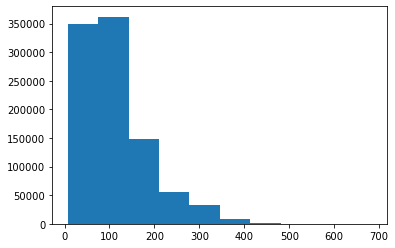

In [88]:
plt.hist(Flights1['AIR_TIME'])
plt.show()

Elapsed Time distribution histogram

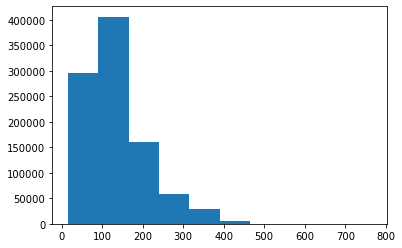

In [89]:
plt.hist(Flights1['ELAPSED_TIME'])
plt.show()




**Regression Starts to predict Arrival Delay**

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [91]:
le = LabelEncoder()

Applying Label encoder to convert text values to numbers

In [92]:
Flights1['AIRLINE']= le.fit_transform(Flights1['AIRLINE'])
Flights1['ORIGIN_AIRPORT'] = le.fit_transform(Flights1['ORIGIN_AIRPORT'])
Flights1['DESTINATION_AIRPORT'] = le.fit_transform(Flights1['DESTINATION_AIRPORT'])
Flights1['Day'] = le.fit_transform(Flights1['Day'])

In [93]:
Flights1 = Flights1.drop(['Scheduled_Departure','Scheduled_Arrival','Actual_Arrival','Date','Actual_Departure'], axis = 1)

In [94]:
Flights1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955807 entries, 0 to 956220
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AIRLINE              955807 non-null  int64  
 1   ORIGIN_AIRPORT       955807 non-null  int64  
 2   DESTINATION_AIRPORT  955807 non-null  int64  
 3   DISTANCE             955807 non-null  int64  
 4   Day                  955807 non-null  int64  
 5   DEPARTURE_DELAY      955807 non-null  float64
 6   ARRIVAL_DELAY        955807 non-null  float64
 7   SCHEDULED_TIME       955807 non-null  float64
 8   ELAPSED_TIME         955807 non-null  float64
 9   AIR_TIME             955807 non-null  float64
 10  TAXI_IN              955807 non-null  float64
 11  TAXI_OUT             955807 non-null  float64
 12  DIVERTED             955807 non-null  int64  
dtypes: float64(7), int64(6)
memory usage: 102.1 MB


In [95]:
X = Flights1.drop('ARRIVAL_DELAY',axis = 1)
X.shape

(955807, 12)

In [96]:
y = Flights1['ARRIVAL_DELAY']
y.head()

0   -22.0
1   -14.0
2   -24.0
3   -35.0
4   -12.0
Name: ARRIVAL_DELAY, dtype: float64

Split into train and test sets

In [97]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 5)

Applying Standard Scalar

In [98]:
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

Applying Linear Regression

In [99]:
from sklearn.linear_model import LinearRegression
LinR = LinearRegression()
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

fitResult = LinR.fit(X_train_sc,y_train)
y_pred = fitResult.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, y_pred))
print ('MSE:' , mean_squared_error(y_test, y_pred))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, y_pred)))
print ('R2:' , r2_score(y_test, y_pred))

MAE: 2.502292531747311e-13
MSE: 1.0815522836813926e-25
RMSE: 3.2886962214248254e-13
R2: 1.0


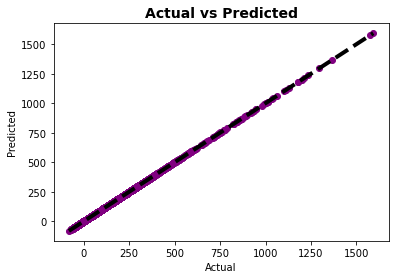

In [100]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, color='purple')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual vs Predicted', fontsize=14, weight='bold')
plt.show()

Applying Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Rfc = RandomForestRegressor(random_state=2)

fitResultR = Rfc.fit(X_train_sc,y_train)
predictedValues = fitResultR.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))

In [ ]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show() 

Applying Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
Dtc = DecisionTreeRegressor(random_state = 2)

fitResultdtc = Dtc.fit(X_train_sc,y_train)
predictedValues = fitResultdtc.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))

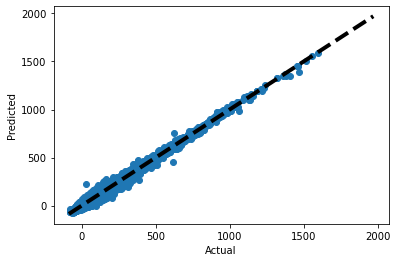

In [76]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show() 

Applying Boosted Linear Regression

In [77]:
from sklearn.ensemble import AdaBoostRegressor
Boost_Lin = AdaBoostRegressor(base_estimator=LinR,random_state=2)

fitResultBl = Boost_Lin.fit(X_train_sc,y_train)
predictedValues = fitResultBl.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))

MAE: 1.5327914823353708e-06
MSE: 3.0655780798971956e-06
RMSE: 0.0017508792305288207
R2: 0.9999999980588673


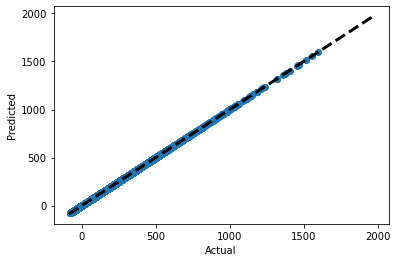

In [78]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show() 

**Dropping Departure delay from set of attributes to try and predict Arrival Delay**

In [79]:
X = Flights1.drop(['ARRIVAL_DELAY','DEPARTURE_DELAY'],axis = 1)
X.shape

(5219244, 11)

In [80]:
y = Flights1['DEPARTURE_DELAY']
y.head()

0   -11.0
1    -4.0
2   -15.0
3   -11.0
4    -8.0
Name: DEPARTURE_DELAY, dtype: float64

In [81]:
X

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Day,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,0,17,275,1448,4,205.0,194.0,169.0,4.0,21.0,0
1,0,17,275,1448,4,204.0,194.0,173.0,4.0,17.0,0
2,0,17,275,1448,4,218.0,198.0,170.0,11.0,17.0,0
3,0,17,275,1448,4,200.0,199.0,176.0,8.0,15.0,0
4,0,17,275,1448,4,205.0,199.0,179.0,4.0,16.0,0
...,...,...,...,...,...,...,...,...,...,...,...
5221995,3,195,239,69,5,34.0,25.0,17.0,2.0,6.0,0
5221996,3,195,239,69,6,34.0,23.0,14.0,5.0,4.0,0
5221997,3,195,239,69,6,34.0,34.0,18.0,4.0,12.0,0
5221998,3,195,239,69,4,34.0,30.0,18.0,3.0,9.0,0


In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 5)
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

Applying MLP Neural Network

In [83]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=0, activation='relu', hidden_layer_sizes=16)

mlp.fit(X_train_sc, y_train)

predictedValues = mlp.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))

MAE: 18.92521792240611
MSE: 1376.49885439204
RMSE: 37.10119747921945
R2: 0.013987506217613577


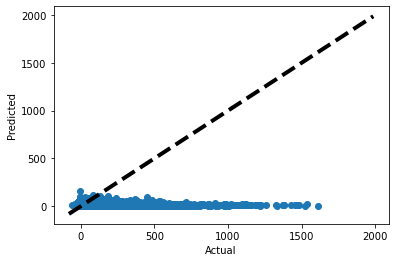

In [84]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show() 

Applying Random Forest Regressor

In [85]:
fitResultR = Rfc.fit(X_train_sc,y_train)
predictedValues = fitResultR.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))

MAE: 20.37511738376943
MSE: 1469.3849594083626
RMSE: 38.332557433705915
R2: -0.05254858987331157


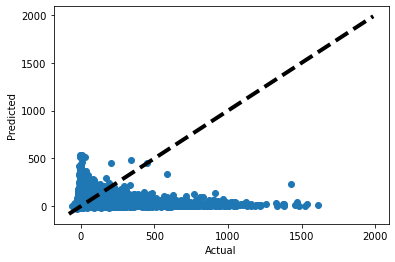

In [86]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show() 

Applying Boosted Linear Regression

In [87]:
fitResultBl = Boost_Lin.fit(X_train_sc,y_train)
predictedValues = fitResultBl.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))

MAE: 45.79086290855338
MSE: 3578.9185387250177
RMSE: 59.82406320808557
R2: -1.5636478970924133


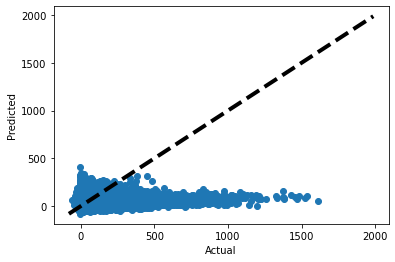

In [88]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show() 

In [89]:
X_test

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Day,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
1331801,4,275,20,2182,5,281.0,252.0,230.0,6.0,16.0,0
4905297,9,113,283,1046,2,150.0,145.0,129.0,6.0,10.0,0
236036,11,227,237,1440,0,234.0,207.0,192.0,3.0,12.0,0
5220003,3,20,77,83,0,42.0,41.0,21.0,3.0,17.0,0
3904446,11,20,66,226,5,74.0,83.0,44.0,9.0,30.0,0
...,...,...,...,...,...,...,...,...,...,...,...
3322861,1,66,39,728,4,120.0,126.0,96.0,7.0,23.0,0
1200682,2,11,86,285,2,78.0,66.0,49.0,5.0,12.0,0
1256422,8,227,215,334,6,95.0,94.0,60.0,9.0,25.0,0
310169,1,175,222,2486,6,343.0,335.0,313.0,5.0,17.0,0


In [90]:
Flights1

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Day,DEPARTURE_DELAY,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,0,17,275,1448,4,-11.0,-22.0,205.0,194.0,169.0,4.0,21.0,0
1,0,17,275,1448,4,-4.0,-14.0,204.0,194.0,173.0,4.0,17.0,0
2,0,17,275,1448,4,-15.0,-35.0,218.0,198.0,170.0,11.0,17.0,0
3,0,17,275,1448,4,-11.0,-12.0,200.0,199.0,176.0,8.0,15.0,0
4,0,17,275,1448,4,-8.0,-14.0,205.0,199.0,179.0,4.0,16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5221995,3,195,239,69,5,-9.0,-18.0,34.0,25.0,17.0,2.0,6.0,0
5221996,3,195,239,69,6,101.0,90.0,34.0,23.0,14.0,5.0,4.0,0
5221997,3,195,239,69,6,10.0,10.0,34.0,34.0,18.0,4.0,12.0,0
5221998,3,195,239,69,4,-14.0,-18.0,34.0,30.0,18.0,3.0,9.0,0


In [91]:
Flights1['ORIGIN_AIRPORT'] = Flights1['ORIGIN_AIRPORT'].astype(str)
Flights1['DESTINATION_AIRPORT'] = Flights1['DESTINATION_AIRPORT'].astype(str)

In [92]:
Flights1['AIRLINE']= le.fit_transform(Flights1['AIRLINE'])
Flights1['ORIGIN_AIRPORT'] = le.fit_transform(Flights1['ORIGIN_AIRPORT'])
Flights1['DESTINATION_AIRPORT'] = le.fit_transform(Flights1['DESTINATION_AIRPORT'])

**Creating a new feature which has value only as 0 or 1 depending on it it is dealyed or not**

In [93]:
Flights1['Is_Delayed'] = np.where(Flights1['ARRIVAL_DELAY']<=0, 0,1)

In [94]:
Flights1

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Day,DEPARTURE_DELAY,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED,Is_Delayed
0,0,79,196,1448,4,-11.0,-22.0,205.0,194.0,169.0,4.0,21.0,0,0
1,0,79,196,1448,4,-4.0,-14.0,204.0,194.0,173.0,4.0,17.0,0,0
2,0,79,196,1448,4,-15.0,-35.0,218.0,198.0,170.0,11.0,17.0,0,0
3,0,79,196,1448,4,-11.0,-12.0,200.0,199.0,176.0,8.0,15.0,0,0
4,0,79,196,1448,4,-8.0,-14.0,205.0,199.0,179.0,4.0,16.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5221995,3,107,156,69,5,-9.0,-18.0,34.0,25.0,17.0,2.0,6.0,0,0
5221996,3,107,156,69,6,101.0,90.0,34.0,23.0,14.0,5.0,4.0,0,1
5221997,3,107,156,69,6,10.0,10.0,34.0,34.0,18.0,4.0,12.0,0,1
5221998,3,107,156,69,4,-14.0,-18.0,34.0,30.0,18.0,3.0,9.0,0,0


In [95]:
X = Flights1.drop(['ARRIVAL_DELAY','Is_Delayed'],axis = 1)
X.shape
y = Flights1['Is_Delayed']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Is_Delayed, dtype: int32

In [96]:
X

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Day,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,0,79,196,1448,4,-11.0,205.0,194.0,169.0,4.0,21.0,0
1,0,79,196,1448,4,-4.0,204.0,194.0,173.0,4.0,17.0,0
2,0,79,196,1448,4,-15.0,218.0,198.0,170.0,11.0,17.0,0
3,0,79,196,1448,4,-11.0,200.0,199.0,176.0,8.0,15.0,0
4,0,79,196,1448,4,-8.0,205.0,199.0,179.0,4.0,16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5221995,3,107,156,69,5,-9.0,34.0,25.0,17.0,2.0,6.0,0
5221996,3,107,156,69,6,101.0,34.0,23.0,14.0,5.0,4.0,0
5221997,3,107,156,69,6,10.0,34.0,34.0,18.0,4.0,12.0,0
5221998,3,107,156,69,4,-14.0,34.0,30.0,18.0,3.0,9.0,0


In [97]:
y

0          0
1          0
2          0
3          0
4          0
          ..
5221995    0
5221996    1
5221997    1
5221998    0
5221999    0
Name: Is_Delayed, Length: 5219244, dtype: int32

In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 2)

In [99]:
y_train.value_counts()

0    2294725
1    1358745
Name: Is_Delayed, dtype: int64

Applying SMOTE to deal with class imbalance

In [100]:
from imblearn.over_sampling import SMOTE

In [101]:
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)

In [102]:
pd.Series(y_train).value_counts()

1    2294725
0    2294725
Name: Is_Delayed, dtype: int64

In [103]:
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

In [104]:
y_train

0          1
1          0
2          0
3          1
4          1
          ..
4589445    1
4589446    1
4589447    1
4589448    1
4589449    1
Name: Is_Delayed, Length: 4589450, dtype: int32

In [105]:
X_test

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Day,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
20405,0,154,196,1107,5,-3.0,180.0,176.0,152.0,13.0,11.0,0
1235219,12,303,130,680,1,11.0,124.0,107.0,89.0,4.0,14.0,0
4232936,9,117,299,850,1,-1.0,155.0,120.0,106.0,5.0,9.0,0
3635419,7,197,74,2586,6,8.0,330.0,322.0,297.0,10.0,15.0,0
4461352,8,303,5,996,5,-4.0,173.0,173.0,148.0,3.0,22.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
509643,10,92,143,733,4,46.0,158.0,155.0,132.0,9.0,14.0,0
2137315,12,197,58,1635,1,-1.0,234.0,224.0,195.0,12.0,17.0,0
2754757,9,269,104,861,2,0.0,145.0,128.0,113.0,7.0,8.0,0
1200730,2,13,304,285,1,3.0,78.0,73.0,53.0,5.0,15.0,0


Decision trees

In [106]:
from sklearn.tree import DecisionTreeClassifier
classifierDT = DecisionTreeClassifier(criterion = 'entropy', random_state = None)
classifierDT.fit(X_train_sc, y_train)

DecisionTreeClassifier(criterion='entropy')

In [107]:
#from sklearn.externals.six import StringIO  
#from IPython.display import Image  
#from sklearn.tree import export_graphviz
#import pydotplus
#dot_data = StringIO()
#export_graphviz(classifierDT, out_file=dot_data,  
 #               filled=True, rounded=True,
 #               special_characters=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

In [108]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [109]:
from sklearn.metrics import confusion_matrix

In [110]:
# Predicting the Test set results
y_pred = classifierDT.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
score = classifierDT.score(X_test_sc,y_test)

C:\Users\sasha\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [111]:
cm

array([[   316, 983210],
       [    10, 582238]], dtype=int64)

In [112]:
score

0.9828595953183538

In [113]:
print("F1 score :",f1_score(y_test, y_pred, average="macro"))
print("Precision Score :" , precision_score(y_test, y_pred, average="macro"))
print("Recall Score :" , recall_score(y_test, y_pred, average="macro"))   

F1 score : 0.27142007574819443
Precision Score : 0.6706278722446821
Recall Score : 0.5001520590842271


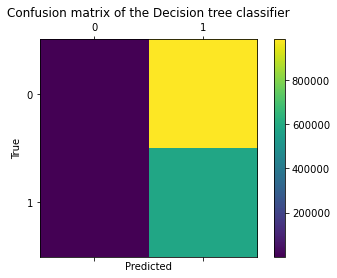

In [114]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the Decision tree classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

K nearest neighbours classifier

In [115]:
from sklearn.neighbors import KNeighborsClassifier
objClassifier=KNeighborsClassifier(n_neighbors=10,metric='minkowski',p=2)
objClassifier.fit(X_train_sc,y_train)

KNeighborsClassifier(n_neighbors=10)

In [116]:
y_pred=objClassifier.predict(X_test_sc)

#Making the confussion matarix 

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

score=objClassifier.score(X_test,y_test)

C:\Users\sasha\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [117]:
cm

array([[920160,  63366],
       [122008, 460240]], dtype=int64)

In [118]:
score

0.37217887128027416

In [119]:
print("F1 score :",f1_score(y_test, y_pred, average="macro"))
print("Precision Score :" , precision_score(y_test, y_pred, average="macro"))
print("Recall Score :" , recall_score(y_test, y_pred, average="macro"))   

F1 score : 0.8704294615437589
Precision Score : 0.8809550941842161
Recall Score : 0.8630130879179962


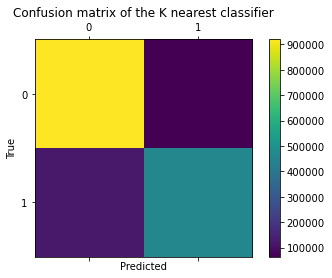

In [120]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the K nearest classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Logistic regression

In [121]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_sc, y_train)

LogisticRegression(random_state=0)

In [122]:
# Predicting the Test set results
y_pred = classifier.predict(X_test_sc)

# Making the Confusion Matrix
score = classifier.score(X_test_sc,y_test)
cm = confusion_matrix(y_test, y_pred)

In [123]:
cm

array([[983526,      0],
       [     0, 582248]], dtype=int64)

In [124]:
score

1.0

In [125]:
print("F1 score :",f1_score(y_test, y_pred, average="macro"))
print("Precision Score :" , precision_score(y_test, y_pred, average="macro"))
print("Recall Score :" , recall_score(y_test, y_pred, average="macro"))   

F1 score : 1.0
Precision Score : 1.0
Recall Score : 1.0


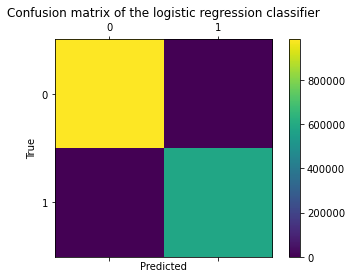

In [126]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the logistic regression classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Applying Naive Bayes

In [127]:
from sklearn.naive_bayes import GaussianNB
objclassifierGNB=GaussianNB()
objclassifierGNB.fit(X_train_sc,y_train)

GaussianNB()

In [128]:
# Predicting the Test set results
y_pred = objclassifierGNB.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
score = objclassifierGNB.score(X_test_sc,y_test)

C:\Users\sasha\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [129]:
cm

array([[505606, 477920],
       [120485, 461763]], dtype=int64)

In [130]:
score

0.839889409327272

In [131]:
print("F1 score :",f1_score(y_test, y_pred, average="macro"))
print("Precision Score :" , precision_score(y_test, y_pred, average="macro"))
print("Recall Score :" , recall_score(y_test, y_pred, average="macro"))   

F1 score : 0.6175217201916054
Precision Score : 0.649481437622122
Recall Score : 0.6535720728602936


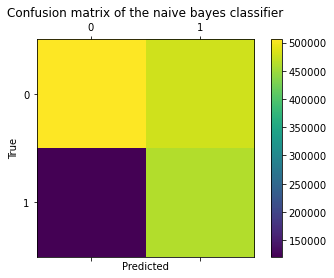

In [132]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the naive bayes classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()